In [2]:
# %pip install "mne[hdf5]"
# %pip install --upgrade mne-bids[full]

     ---------------------------------------- 0.0/61.2 kB ? eta -:--:--
     ---------------------------------------- 61.2/61.2 kB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 60.4/60.4 kB 3.1 MB/s eta 0:00:00
  Using cached matplotlib-3.8.2-cp311-cp311-win_amd64.whl.metadata (5.9 kB)
  Using cached tqdm-4.66.1-py3-none-any.whl.metadata (57 kB)
  Using cached Jinja2-3.1.3-py3-none-any.whl.metadata (3.3 kB)
  Using cached contourpy-1.2.0-cp311-cp311-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/160.8 kB ? eta -:--:--
     -------------------------------------- 160.8/160.8 kB 4.9 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.5-cp311-cp311-win_amd64.whl.metadata (6.5 kB)
  Using cached pyparsing-3.1.1-py3-none-any.whl.metadata (5.1 kB)
  Using cached requests-2.31.0-py3-none-any.whl.metadata (4.6 

Could not find platform independent libraries <prefix>


  Using cached pytz-2023.3.post1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2023.4-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/3.3 MB ? eta -:--:--
   --------- ------------------------------ 0.8/3.3 MB 24.4 MB/s eta 0:00:01
   --------------------------- ------------ 2.3/3.3 MB 29.3 MB/s eta 0:00:01
   ---------------------------------------  3.3/3.3 MB 30.1 MB/s eta 0:00:01
   ---------------------------------------- 3.3/3.3 MB 26.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---- ----------------------------------- 1.4/11.6 MB 28.5 MB/s eta 0:00:01
   --------- ------------------------------ 2.9/11.6 MB 36.8 MB/s eta 0:00:01
   ---------------- ----------------------- 4.6/11.6 MB 37.1 MB/s eta 0:00:01
   ---------------------- ----------------- 6.4/11.6 MB 37.1 MB/s eta 0:00:01
   ----------------------- ---------------- 6.8/11.6 MB 31.1 MB/s eta 0:00:01
   ---------------------

Could not find platform independent libraries <prefix>


In [2]:
# %matplotlib qt

In [3]:
import os

import numpy as np
import mne
from mne_bids import BIDSPath, read_raw_bids, print_dir_tree, find_matching_paths
import os.path as op
import matplotlib.pyplot as plt

print(mne_bids.__version__)

NameError: name 'mne_bids' is not defined

In [ ]:
subject = '010'
dataset = 'test_dataset'

bids_root = f'./{dataset}'

print_dir_tree(bids_root, max_depth=4)

|test_dataset/
|--- CHANGES
|--- README
|--- dataset_description.json
|--- participants.json
|--- participants.tsv
|--- sub-010/
|------ eeg/
|--------- sub-010_task-eyesclosed_channels.tsv
|--------- sub-010_task-eyesclosed_eeg.json
|--------- sub-010_task-eyesclosed_eeg.set


In [ ]:
task = "eyesclosed"
suffix = "eeg"

bids_paths = find_matching_paths(
    bids_root, datatypes='eeg', sessions=None, extensions=['set']
)
bids_path = bids_paths[0].update(subject=subject, task=task, suffix=suffix)
bids_path

BIDSPath(
root: test_dataset
datatype: eeg
basename: sub-010_task-eyesclosed_eeg.set)

In [ ]:
raw = read_raw_bids(bids_path=bids_path, verbose=True)

/tmp/ipykernel_650/53549500.py:1: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=True)


Reading channel info from test_dataset/sub-010/eeg/sub-010_task-eyesclosed_channels.tsv.


/tmp/ipykernel_650/53549500.py:1: RuntimeWarning: Did not find any events.tsv associated with sub-010_task-eyesclosed.

The search_str was "test_dataset/sub-010/**/eeg/sub-010*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=True)


In [7]:
raw.info

Measurement date,Unknown
Experimenter,Unknown
Participant,sub-010
Digitized points,22 points
Good channels,19 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,500.00 Hz
Highpass,0.00 Hz
Lowpass,250.00 Hz


Using matplotlib as 2D backend.


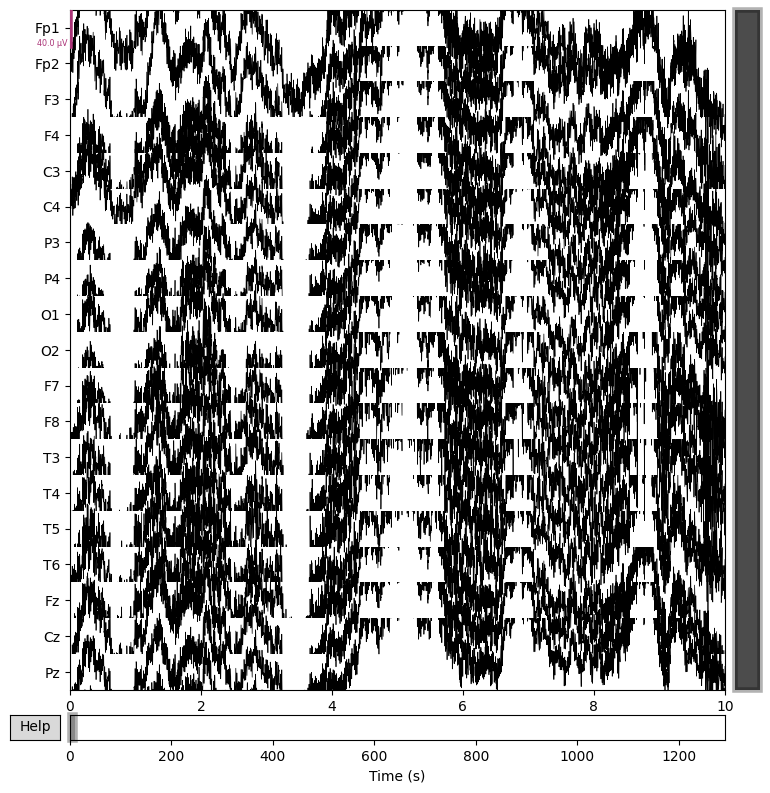

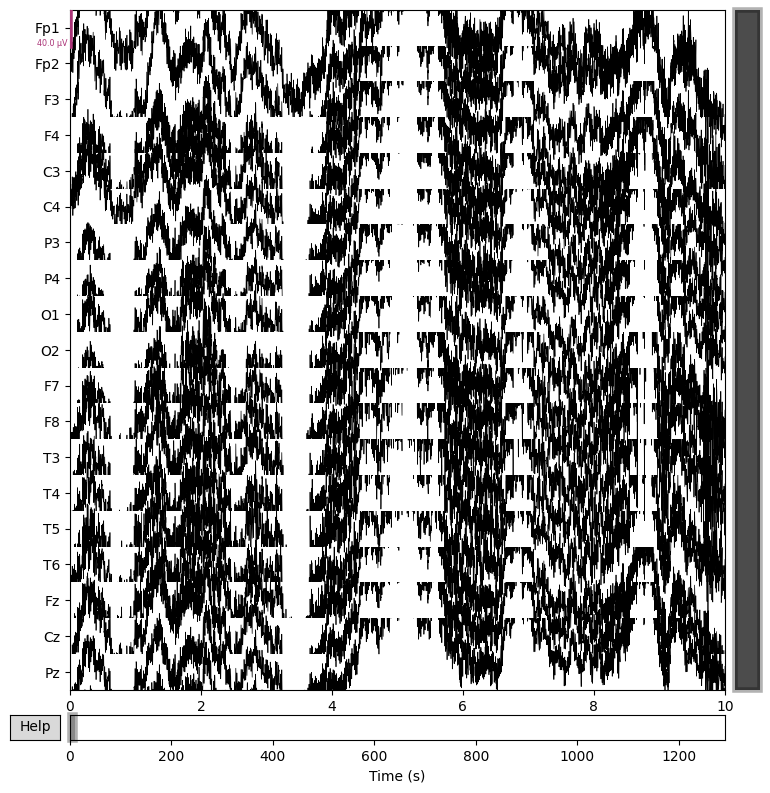

In [8]:
raw.plot()

In [37]:
sampling_freq = raw.info['sfreq']
print("Sampling Rate: %.2fms" % (1 / sampling_freq * 1000))

channels = ['Fp1', 'O1']
start_stop_seconds = np.array([0, 1])
start_sample, stop_sample = (start_stop_seconds * sampling_freq).astype(int)

raw_selection = raw[channels, start_sample:stop_sample]
# raw_selection

Sampling Rate: 2.00ms


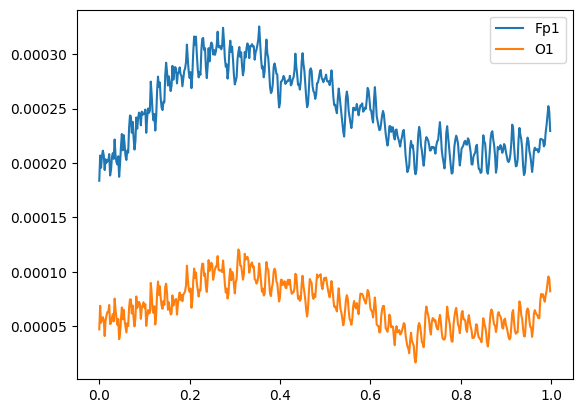

In [49]:
y_offset = np.array([2e-4, 0])

x = raw_selection[1]
y = raw_selection[0].T + y_offset

lines = plt.plot(x, y)
plt.legend(lines, channels)